In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import networkx as nx
import folium

## Data info


#### Reading d.csv

In [74]:
df = pd.read_csv('d.csv')
df.head()

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,U2991Z301,Hněvice,T58005,Hněvice seř.n.,4:53:00,4:54:30,2,0,1,1,1,1,1,0,0
1,T58005,Hněvice seř.n.,U4610Z301,Záluží,4:54:30,4:56:00,2,0,1,1,1,1,1,0,0
2,U4610Z301,Záluží,U4609Z301,Dobříň,4:56:00,4:59:00,2,0,1,1,1,1,1,0,0
3,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,4:59:00,5:03:00,2,0,1,1,1,1,1,0,0
4,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,4:36:00,4:38:00,2,0,1,1,1,1,1,0,0


#### Number and data types

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


#### Count, mean, min, max

In [76]:
df.describe()

,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
count,1.642433e+06,1.642433e+06,1.642433e+06,1.642433e+06,1.642433e+06,1.642433e+06,1.642433e+06,1.642433e+06,1.642433e+06
mean,1.848243e+00,1.763725e-02,7.062644e-01,7.062608e-01,7.062608e-01,7.062608e-01,7.063284e-01,3.000080e-01,3.073313e-01
std,1.413954e+00,1.316290e-01,4.554724e-01,4.554741e-01,4.554741e-01,4.554741e-01,4.554434e-01,4.582612e-01,4.613880e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Shape

In [77]:
print(f'number of rows: {df.shape[0]}\nnumber of columns: {df.shape[1]}')

number of rows: 1642433
number of columns: 15


#### Zero values


In [78]:
df.isnull().sum()

stop_from         0
stop_from_name    0
stop_to           0
stop_to_name      0
depart_from       0
arrive_to         0
route_type        0
is_night          0
monday            0
tuesday           0
wednesday         0
thursday          0
friday            0
saturday          0
sunday            0
dtype: int64

#### sum of duplicated parametrs

In [79]:
df.duplicated().sum()

237854

In [80]:
df['route_type'].unique()

array([2, 3, 0, 4, 7, 1], dtype=int64)

In [81]:
count_route_type = df.groupby('route_type').size()

print(count_route_type)

route_type
0    575015
1     56464
2     55672
3    954268
4       698
7       316
dtype: int64


## Preparing the data

#### Deleating dublicates

In [82]:
#df.drop_duplicates(inplace=True)

#### Changing time

In [83]:
def changing_time(time):
    hours, minutes, seconds = map(int, time.split(':')) #splitting str to H M S by ":"
    hours = hours % 24 #correction by modulo 24
    return f'{hours:02d}:{minutes:02d}:{seconds:02d}'
        
df['depart_from'] = df['depart_from'].apply(changing_time)
df['arrive_to'] = df['arrive_to'].apply(changing_time)


#### Dataframes

New dataframe with names and id only for night streetcars that do not operate on Saturday and Sunday

In [84]:
df1 = df[(df['route_type'] == 0) & (df['is_night'] == 1) & (df['sunday'] == 0) & (df['saturday'] == 0)][['stop_from', 'stop_from_name', 'stop_to', 'stop_to_name']].copy()

In [85]:
df1.drop_duplicates(inplace=True)

In [86]:
df1.shape[0]

482

Creating dataframe with info from stops.txt

In [87]:
stops_df = pd.read_csv('stops.txt', delimiter=',', quotechar='"')
#left merge on stop from id
stops_and_locations_df = df1.merge(stops_df[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']], left_on='stop_from', right_on='stop_id')


In [88]:
stops_and_locations_df

,stop_from,stop_from_name,stop_to,stop_to_name,stop_id,stop_name,stop_lat,stop_lon
0,U651Z1P,Sídliště Ďáblice,U467Z1P,Třebenická,U651Z1P,Sídliště Ďáblice,50.132706,14.479488
1,U467Z1P,Třebenická,U740Z1P,Štěpničná,U467Z1P,Třebenická,50.129536,14.480904
2,U740Z1P,Štěpničná,U78Z1P,Ládví,U740Z1P,Štěpničná,50.127975,14.477279
3,U78Z1P,Ládví,U314Z1P,Kyselova,U78Z1P,Ládví,50.126484,14.470140
4,U314Z1P,Kyselova,U676Z1P,Střelničná,U314Z1P,Kyselova,50.126179,14.463021
...,...,...,...,...,...,...,...,...
477,U47Z2P,Blatiny,U612Z2P,Sídliště Řepy,U47Z2P,Blatiny,50.065804,14.302096
478,U47Z2P,Blatiny,U612Z12P,Sídliště Řepy,U47Z2P,Blatiny,50.065804,14.302096
479,U612Z3P,Sídliště Řepy,U47Z1P,Blatiny,U612Z3P,Sídliště Řepy,50.065174,14.298884
480,U481Z2P,Švandovo divadlo,U4Z2P,Arbesovo náměstí,U481Z2P,Švandovo divadlo,50.077969,14.404120


## Graph

Map of stops for night streetcars that do not operate on Saturdays and Sundays (Tap to see the name of the stop).

In [89]:
G = nx.DiGraph() #initializing a directed graph

# adding edges between stops(nodes)
for index, row in stops_and_locations_df.iterrows():
    G.add_edge(row['stop_from_name'], row['stop_to_name'], weight=1)

# creating map of the Prague with folium library
map_prague = folium.Map(location=[50.0755, 14.4378], zoom_start=12)


# creating dataframes with sourse nodes(edge[0]) and destination nodes(edge[1])
for edge in G.edges():
    start_df = stops_and_locations_df[stops_and_locations_df['stop_name'] == edge[0]]
    end_df = stops_and_locations_df[stops_and_locations_df['stop_name'] == edge[1]]

    if not start_df.empty and not end_df.empty: #checking if there are not empty
        start_pos = (start_df.iloc[0]['stop_lat'], start_df.iloc[0]['stop_lon'])#extracting coordinates for start and end points
        end_pos = (end_df.iloc[0]['stop_lat'], end_df.iloc[0]['stop_lon'])
        folium.PolyLine([start_pos, end_pos], color="blue", weight=2.5, opacity=1).add_to(map_prague)#creating connection line between start and end points


for index, row in stops_and_locations_df.iterrows():
   
    folium.CircleMarker( #creating marker by lat and long for points
        (row['stop_lat'], row['stop_lon']),
        radius=2,  
        color='darkred',  
        fill=True,
        popup=row['stop_name']  # assigns a popup with name of tramstop to the marker
    ).add_to(map_prague)

# vizualization
map_prague.save('prague_map.html')

In [90]:
map_prague

## Сentrality analysis

To analyze the centrality I will take the work of streetcar stops, to analyze the importance of stops, we will look at degree centrality (indicates whether a stop is a crossroads of many routes, shows the number of connections of a node with other nodes ), mediation centrality (shows whether a stop is in routes connecting different parts of the network, how often a node is a link between other nodes) and proximity centrality (estimates how fast it is to get from one stop to other stops).

In [91]:
df_analisis = df[(df['route_type'] == 0)][['stop_from', 'stop_from_name', 'stop_to', 'stop_to_name', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].copy()

In [92]:
df_analisis.drop_duplicates()

,stop_from,stop_from_name,stop_to,stop_to_name,monday,tuesday,wednesday,thursday,friday,saturday,sunday
35575,U865Z2P,Vozovna Motol,U394Z2P,Motol,1,1,1,1,1,0,0
35576,U394Z2P,Motol,U395Z2P,Krematorium Motol,1,1,1,1,1,0,0
35577,U395Z2P,Krematorium Motol,U113Z2P,Hlušičkova,1,1,1,1,1,0,0
35578,U113Z2P,Hlušičkova,U236Z2P,Slánská,1,1,1,1,1,0,0
35579,U236Z2P,Slánská,U47Z2P,Blatiny,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1611518,U395Z2P,Krematorium Motol,U113Z2P,Hlušičkova,1,1,1,1,1,0,1
1611519,U113Z2P,Hlušičkova,U236Z2P,Slánská,1,1,1,1,1,0,1
1611520,U236Z2P,Slánská,U47Z2P,Blatiny,1,1,1,1,1,0,1
1611521,U47Z2P,Blatiny,U612Z12P,Sídliště Řepy,1,1,1,1,1,0,1


In [93]:
G = nx.DiGraph()

In [94]:
for index, row in df_analisis.iterrows():
    # Calculating weight as the sum of active days per week for the edge
    weight = row[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum()
    G.add_edge(row['stop_from_name'], row['stop_to_name'], weight=weight)
#Finding centrality with networkx 
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
closeness_centrality = nx.closeness_centrality(G, distance='weight')
centrality_df = pd.DataFrame({
    'stop': list(degree_centrality.keys()),
    'degree_centrality': list(degree_centrality.values()),
    'betweenness_centrality': list(betweenness_centrality.values()),
    'closeness_centrality': list(closeness_centrality.values())
})


In [95]:
centrality_df

,stop,degree_centrality,betweenness_centrality,closeness_centrality
0,Vozovna Motol,0.014286,0.042012,0.010888
1,Motol,0.014286,0.035138,0.010347
2,Krematorium Motol,0.014286,0.028213,0.009854
3,Hlušičkova,0.014286,0.021237,0.009402
4,Slánská,0.014286,0.014209,0.008987
...,...,...,...,...
276,Křížová,0.014286,0.028213,0.017964
277,Braunova,0.014286,0.021237,0.017654
278,Laurová,0.014286,0.014209,0.017354
279,Škola Radlice,0.014286,0.007130,0.017061


#### Degree centrality

Malostranska, Namesti Bratri Synku, Otakarova are stops with the biggest degree centrality, which means that a large number of routes pass through them.

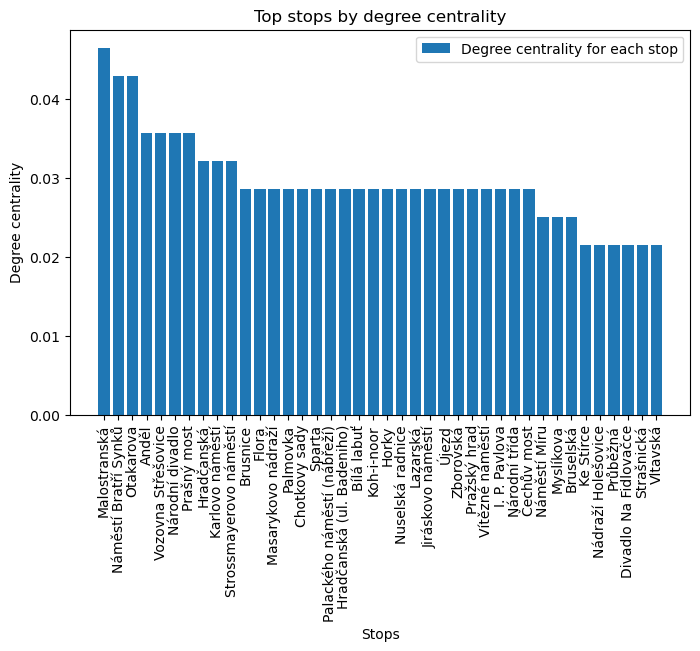

In [112]:
top_degree_centrality = centrality_df.sort_values(by='degree_centrality', ascending=False)
#top values for degree centrality

plt.figure(figsize=(8, 5))
plt.bar(top_degree_centrality['stop'].head(40), top_degree_centrality['degree_centrality'].head(40), label = 'Degree centrality for each stop')
plt.xlabel('Stops')
plt.ylabel('Degree centrality')
plt.title('Top stops by degree centrality')
plt.xticks(rotation=90)
plt.legend()
plt.show()


#### Betweenness centrality

Malostranska, Cechuv most, Narodni Divadlo are stops with the biggest betweenness centrality, wich means that these stops act as a link between other stops quite often.

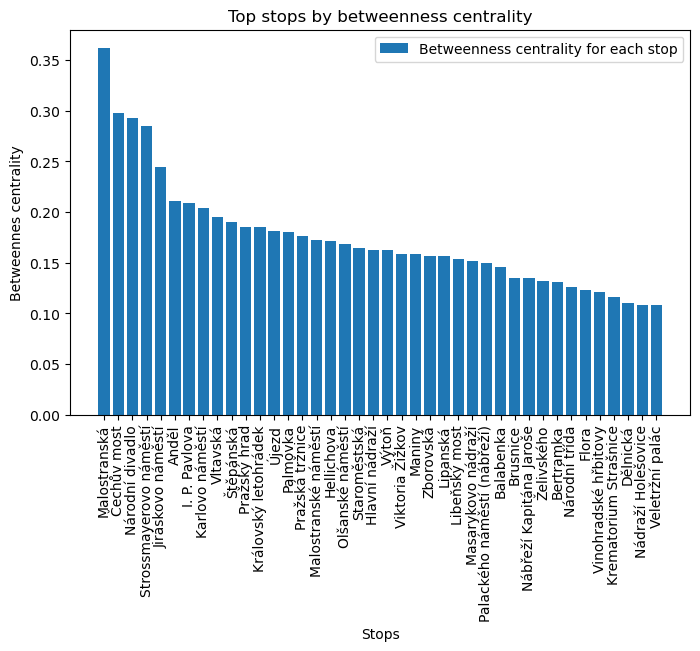

In [111]:
top_betweenness_centrality = centrality_df.sort_values(by='betweenness_centrality', ascending=False)


plt.figure(figsize=(8, 5))
plt.bar(top_betweenness_centrality['stop'].head(40), top_betweenness_centrality['betweenness_centrality'].head(40), label = 'Betweenness centrality for each stop')
plt.xlabel('Stops')
plt.ylabel('Betweennes centrality')
plt.title('Top stops by betweenness centrality')
plt.xticks(rotation=90)
plt.legend()
plt.show()


#### Closeness centrality

Ujezd, Karlovo namesti, Narodni Divadlo are stops with the biggest closeness centrality, wich means that from these stops we can easy and quickly get to the other stops.

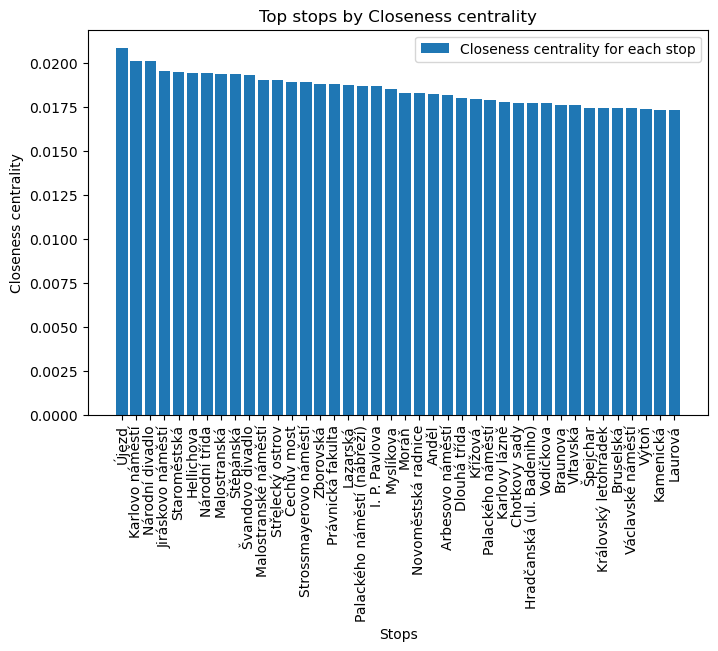

In [110]:
top_closeness_centrality = centrality_df.sort_values(by='closeness_centrality', ascending=False)


plt.figure(figsize=(8, 5))
plt.bar(top_closeness_centrality['stop'].head(40), top_closeness_centrality['closeness_centrality'].head(40), label = 'Closeness centrality for each stop')
plt.xlabel('Stops')
plt.ylabel('Closeness centrality')
plt.title('Top stops by Closeness centrality')
plt.xticks(rotation=90)
plt.legend()
plt.show()


### Graph for Betweenness centrality

In [99]:

df3 = df[(df['route_type'] == 0)][['stop_from', 'stop_from_name', 'stop_to', 'stop_to_name','monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].copy()
merged_df = df3.merge(stops_df[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']], left_on='stop_from', right_on='stop_id')


In [100]:
 merged_df.drop_duplicates()

,stop_from,stop_from_name,stop_to,stop_to_name,monday,tuesday,wednesday,thursday,friday,saturday,sunday,stop_id,stop_name,stop_lat,stop_lon
0,U865Z2P,Vozovna Motol,U394Z2P,Motol,1,1,1,1,1,0,0,U865Z2P,Vozovna Motol,50.067863,14.340385
4,U865Z2P,Vozovna Motol,U394Z2P,Motol,0,0,0,0,0,1,1,U865Z2P,Vozovna Motol,50.067863,14.340385
9,U865Z2P,Vozovna Motol,U394Z2P,Motol,0,0,0,0,0,0,1,U865Z2P,Vozovna Motol,50.067863,14.340385
38,U865Z2P,Vozovna Motol,U394Z2P,Motol,1,1,1,1,1,1,1,U865Z2P,Vozovna Motol,50.067863,14.340385
241,U865Z2P,Vozovna Motol,U394Z2P,Motol,0,0,0,0,0,1,0,U865Z2P,Vozovna Motol,50.067863,14.340385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574845,U997Z4P,Lazarská,U539Z2P,Národní třída,1,1,1,1,1,0,0,U997Z4P,Lazarská,50.080021,14.419834
574909,U997Z3P,Lazarská,U237Z2P,Karlovo náměstí,1,1,1,1,1,1,1,U997Z3P,Lazarská,50.079365,14.419500
574918,U997Z3P,Lazarská,U237Z2P,Karlovo náměstí,1,1,1,1,1,0,0,U997Z3P,Lazarská,50.079365,14.419500
574957,U997Z3P,Lazarská,U484Z2P,Vodičkova,1,1,1,1,1,1,1,U997Z3P,Lazarská,50.079365,14.419500


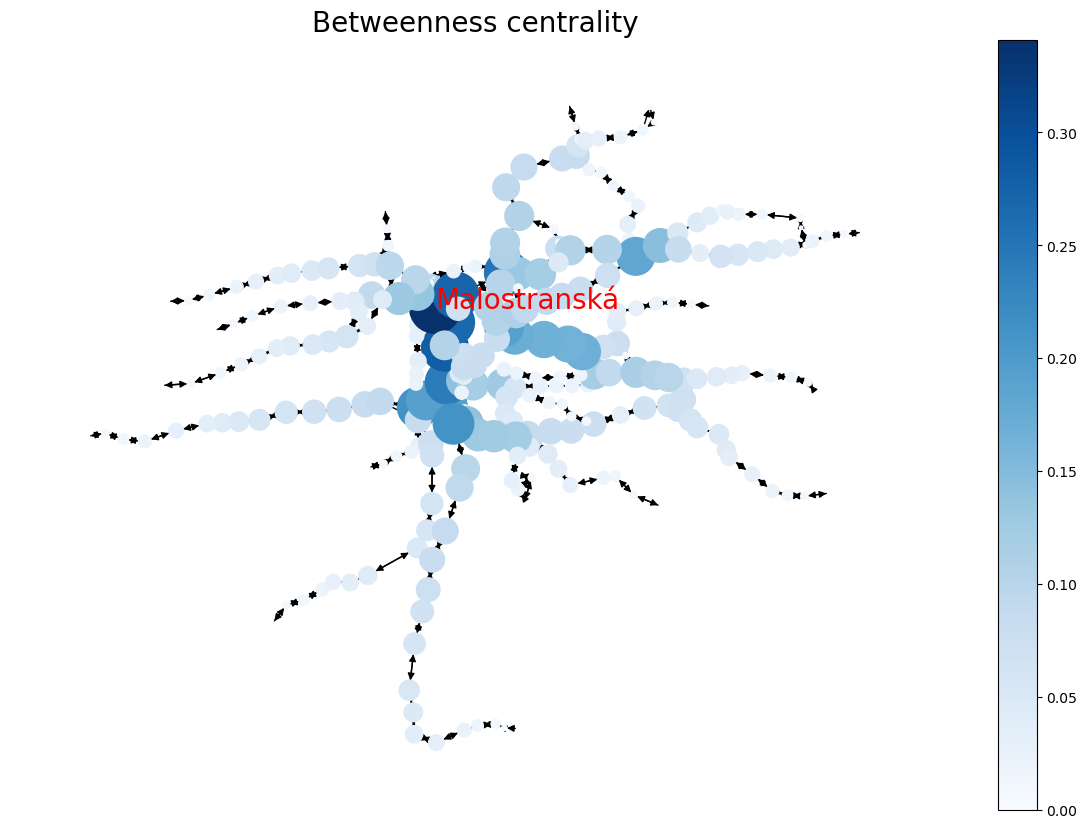

In [101]:
G = nx.DiGraph()

# adding nodes, edges
for index, row in merged_df.iterrows():
    G.add_node(row['stop_from_name'], pos=(row['stop_lon'], row['stop_lat']))
    G.add_edge(row['stop_from_name'], row['stop_to_name'])

# calculating betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# stop with highest betweenness cent.
top_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:1]


# Getting locations
pos = {row['stop_name']: (row['stop_lon'], row['stop_lat']) for index, row in merged_df.iterrows()}

# Normalizing the colors and adding size due to betweenness centrality
colors = [betweenness_centrality[node] for node in G.nodes()]
sizes = [4000 * betweenness_centrality[node] for node in G.nodes()]
max_color = max(colors) if colors else 1
min_color = min(colors) if colors else 0
colors_normalized = [(c - min_color) / (max_color - min_color) for c in colors]

# creating graph
fig, ax = plt.subplots(figsize=(15, 10))
nx.draw(G, pos, node_size=sizes, with_labels=False, node_color=colors_normalized, cmap=plt.cm.Blues, ax=ax)

# Labeling only Malostranska
for node in top_nodes:
    plt.text(pos[node][0], pos[node][1], node, fontsize=20, color='red')

plt.title("Betweenness centrality", fontsize=20)
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min_color, vmax=max_color))
sm.set_array([])
plt.colorbar(sm, ax=ax)

plt.show()

### My Questions

#### Find a way from IP Pavlova to Malostranska

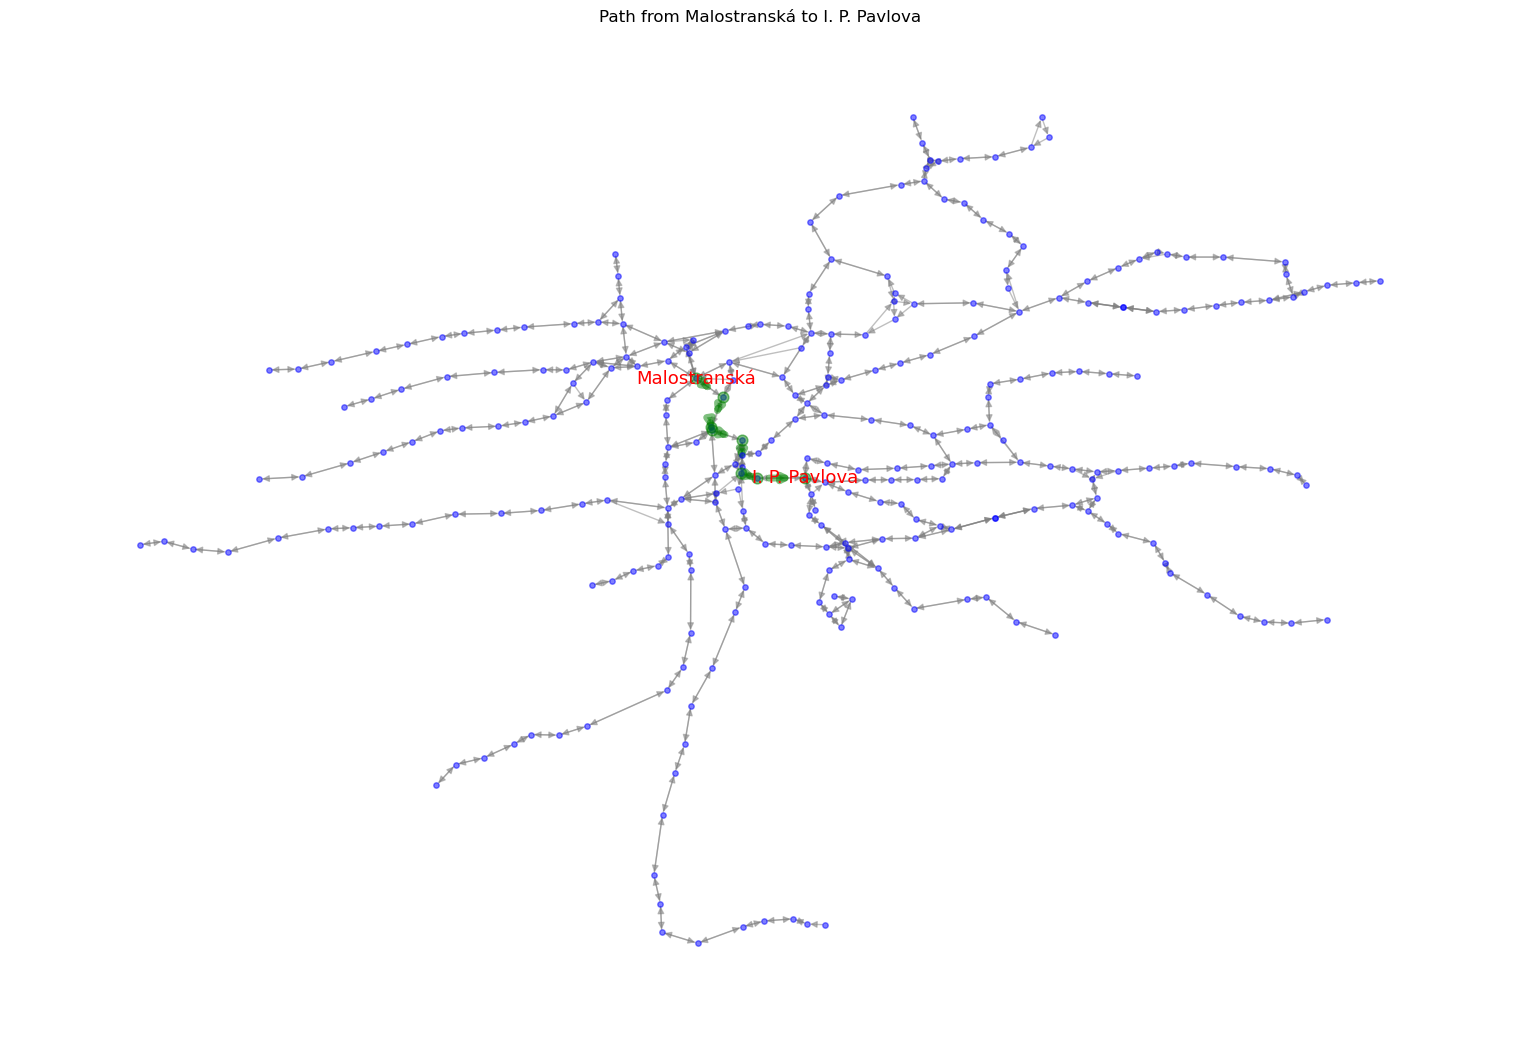

In [113]:
G = nx.DiGraph()

# adding nodes and edges
for index, row in merged_df.iterrows():
    G.add_node(row['stop_from_name'], pos=(row['stop_lon'], row['stop_lat']))
    G.add_edge(row['stop_from_name'], row['stop_to_name'])
 #finding shortest path   
path = nx.shortest_path(G, source='Malostranská', target='I. P. Pavlova')
pos = {row['stop_name']: (row['stop_lon'], row['stop_lat']) for index, row in merged_df.iterrows()}
plt.figure(figsize=(15, 10)) 
node_size = 15
node_size2 = 60
# blue nodes por every stop
nx.draw(G, pos, with_labels=False, node_color='blue', edge_color='gray', alpha = 0.5, node_size=node_size)
#green path from Malost. to IP
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='green', alpha = 0.5, node_size=node_size2)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', alpha = 0.5, width=5)

# dict for stops names for labels
labels = {'Malostranská': 'Malostranská', 'I. P. Pavlova': 'I. P. Pavlova'}
font_size = 13
# adding labals only for start and end of the path
nx.draw_networkx_labels(G, pos, labels=labels, font_color='red', font_size = font_size)

plt.title("Path from Malostranská to I. P. Pavlova")
plt.show()